In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [23]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [24]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [25]:
#Calculamos el numero total de la población "n"
Milan['host_acceptance_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [26]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['host_acceptance_rate'].max()
Min = Milan['host_acceptance_rate'].min()
Limites = [Min, Max]
Limites

[0.03, 1.0]

In [27]:
# Calculamos el rango R
R = Max - Min
R

0.97

In [28]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 27706
ni = 1 + 3.32 * np.log10(n)
ni

15.749345115216984

In [29]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.061589862492935535

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [30]:
# Categorización de variables
intervalos = np.linspace (0.03, 1, 16)
intervalos

array([0.03      , 0.09466667, 0.15933333, 0.224     , 0.28866667,
       0.35333333, 0.418     , 0.48266667, 0.54733333, 0.612     ,
       0.67666667, 0.74133333, 0.806     , 0.87066667, 0.93533333,
       1.        ])

In [32]:
# Creamos las categorías
categorias = [
    "Rechazo total",
    "Muy baja aceptación",
    "Baja aceptación",
    "Aceptación limitada",
    "Aceptación moderada",
    "Aceptación estándar",
    "Aceptación buena",
    "Aceptación alta",
    "Aceptación muy alta",
    "Aceptación excelente",
    "Casi siempre acepta",
    "Aceptación máxima",
    "Hospedaje confiable",
    "Aceptación potencial",
    "Aceptación segura"
]


In [33]:
# Creamos las ctegorias en la columna numerica
Milan['host_acceptance_rate'] = pd.cut ( x = Milan ['host_acceptance_rate'], bins = intervalos, labels = categorias )
Milan['host_acceptance_rate']

0        Aceptación potencial
1             Baja aceptación
2         Aceptación estándar
3           Aceptación máxima
4        Aceptación potencial
                 ...         
23700     Hospedaje confiable
23701       Aceptación segura
23702       Aceptación segura
23703       Aceptación segura
23704       Aceptación segura
Name: host_acceptance_rate, Length: 23705, dtype: category
Categories (15, object): ['Rechazo total' < 'Muy baja aceptación' < 'Baja aceptación' < 'Aceptación limitada' ... 'Aceptación máxima' < 'Hospedaje confiable' < 'Aceptación potencial' < 'Aceptación segura']

In [34]:
table1 = freq_tbl(Milan['host_acceptance_rate'])
table1

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,Aceptación segura,15040,0.634465,0.634492
1,Hospedaje confiable,2648,0.111706,0.746203
2,Aceptación potencial,2501,0.105505,0.851713
3,Aceptación máxima,758,0.031976,0.883691
4,Aceptación alta,451,0.019026,0.902717
5,Aceptación excelente,430,0.018140,0.920857
6,Casi siempre acepta,418,0.017633,0.938491
7,Aceptación muy alta,317,0.013373,0.951865
8,Aceptación moderada,282,0.011896,0.963761
9,Baja aceptación,222,0.009365,0.973127


In [35]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_acceptance_rate,frequency
0,Aceptación segura,15040
1,Hospedaje confiable,2648
2,Aceptación potencial,2501
3,Aceptación máxima,758
4,Aceptación alta,451
5,Aceptación excelente,430
6,Casi siempre acepta,418
7,Aceptación muy alta,317
8,Aceptación moderada,282
9,Baja aceptación,222


In [36]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('host_acceptance_rate')
Filtro_index

,frequency
host_acceptance_rate,
Aceptación segura,15040
Hospedaje confiable,2648
Aceptación potencial,2501
Aceptación máxima,758
Aceptación alta,451
Aceptación excelente,430
Casi siempre acepta,418
Aceptación muy alta,317
Aceptación moderada,282


<Axes: xlabel='host_acceptance_rate'>

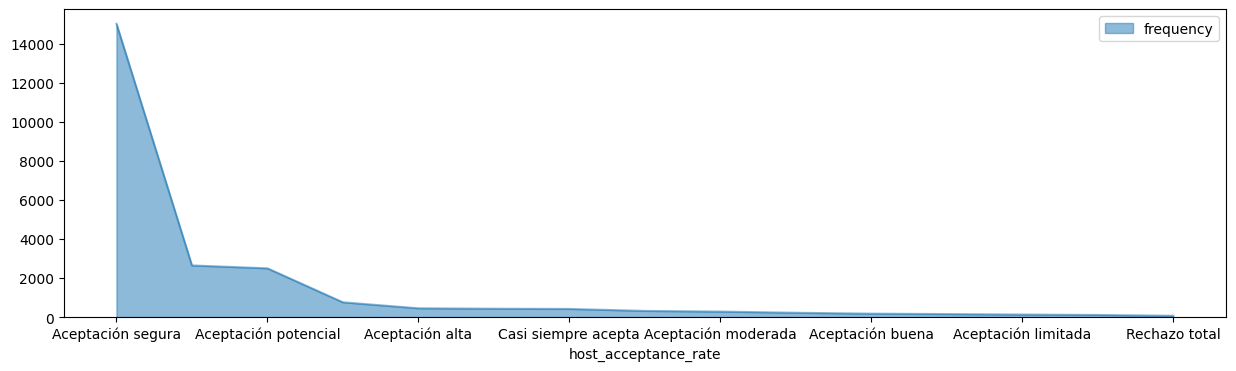

In [37]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)